In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [2]:
df = pd.read_csv('indian_license_plates.csv')
df.head()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,494,449,0.161943,0.850780,0.582996,1.000000
1,licensed_car1,500,314,0.082000,0.697452,0.230000,0.828025
2,licensed_car2,551,455,0.411978,0.529670,0.805808,0.692308
3,licensed_car3,1569,1119,0.410758,0.453714,0.568867,0.516571
4,licensed_car4,1632,918,0.413203,0.397101,0.586797,0.623188


In [3]:
df.shape

(192, 7)

# Loading the images

In [4]:
DATA_DIR = './Number Plates'
WIDTH = 224
HEIGHT = 224
CHANNEL = 3
data = []
for img in os.listdir(DATA_DIR):
    img_arr = cv2.imread(os.path.join(DATA_DIR,img),CHANNEL)
    new_arr = cv2.resize(img_arr, (HEIGHT,WIDTH))
    data.append([img, new_arr])

In [5]:
np.shape(data)

(192, 2)

# plotting random images

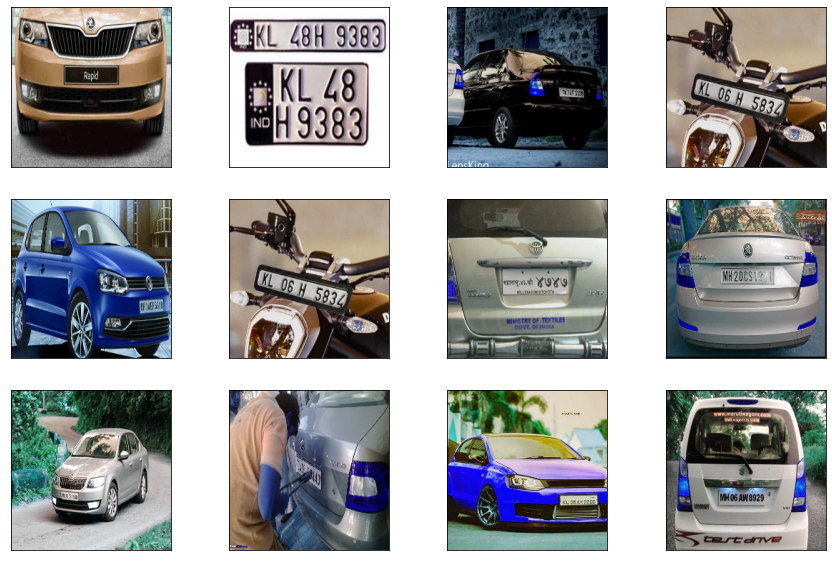

In [6]:
val = np.random.randint(0, 191, 12)
r = 1
plt.figure(figsize = (15,10))
for index in val:
    plt.subplot(3,4,r)
    plt.imshow(data[index][1])
    plt.xticks([])
    plt.yticks([])
    r += 1
plt.show()

# dropping unnecessary columns from csv file

In [7]:
df = df.drop(['image_width', 'image_height'], axis=1)

In [8]:
df.columns

Index(['image_name', 'top_x', 'top_y', 'bottom_x', 'bottom_y'], dtype='object')

# Model

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.applications.vgg16 import VGG16

model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='sigmoid'))
model.layers[-6].trainable = False
model.summary()

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-trainable params: 14,714,688
_________________________________